# Cyclic Descision Tree
## By Christian Koutsandreas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load results dataframe from memory
results_df = pd.read_pickle('svm_pre_trained.pkl')
results_df2 = pd.read_pickle('svm_pre_trained2.pkl')

In [ ]:
results_df = pd.concat([results_df, results_df2])

In [22]:
# hyper params in str form
results_df['param_as_str'] = results_df.apply(lambda x: '('+str(x['kernal'])+', '+str(x['reg_param'])+')', axis=1)

Text(0.5, 0, 'Hyper Params')

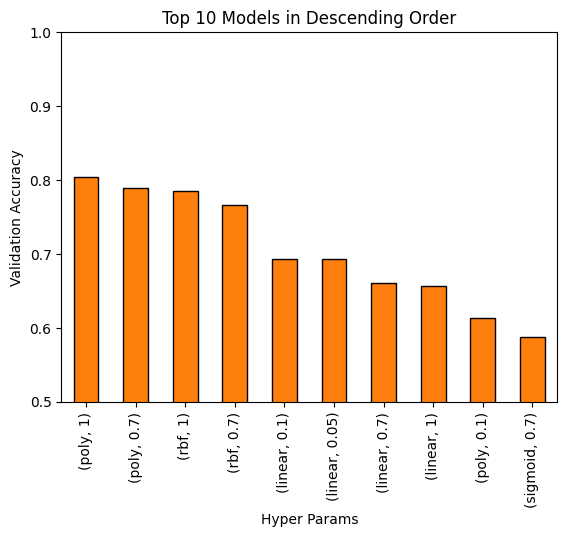

In [9]:
# lets plot the top val accuracy of top models
bars = 10 #configuration variable
results_df.sort_values(by=['validation_accuracy'], ascending = False).head(bars).plot.bar(x='param_as_str', y='validation_accuracy', color='tab:orange', legend=None, edgecolor = "black")
plt.ylim(.5,1)
plt.title('Top '+str(min(bars, results_df.shape[0]))+' Models in Descending Order')
plt.ylabel('Validation Accuracy')
plt.xlabel('Hyper Params')

It appears we may want to try greater regularization paramaters to reach a more optimal model. Different kernals perform better with small regularization paramaters while others with greater. Lets investigate further.

Text(0.5, 0, 'Regularization Paramater')

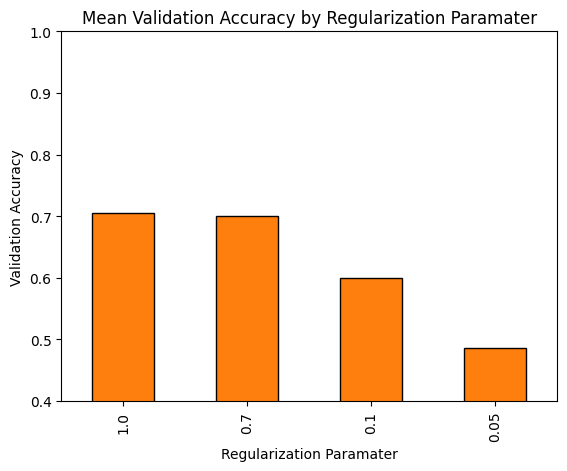

In [20]:
results_df.groupby(["reg_param"])["validation_accuracy"].mean().squeeze().sort_values(ascending = False).plot.bar(color='tab:orange', edgecolor = "black")
plt.ylim(.4,1)
plt.title("Mean Validation Accuracy by Regularization Paramater\n")
plt.ylabel("Validation Accuracy")
plt.xlabel("Regularization Paramater")

Text(0.5, 0, 'Kernal')

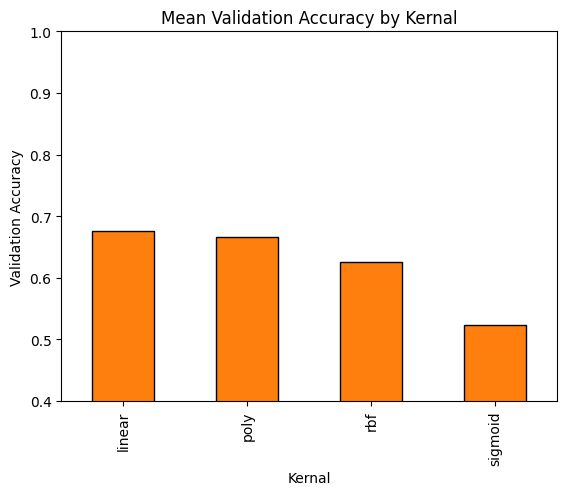

In [21]:
results_df.groupby(["kernal"])["validation_accuracy"].mean().squeeze().sort_values(ascending = False).plot.bar(color='tab:orange', edgecolor = "black")
plt.ylim(.4,1)
plt.title("Mean Validation Accuracy by Kernal")
plt.ylabel("Validation Accuracy")
plt.xlabel("Kernal")

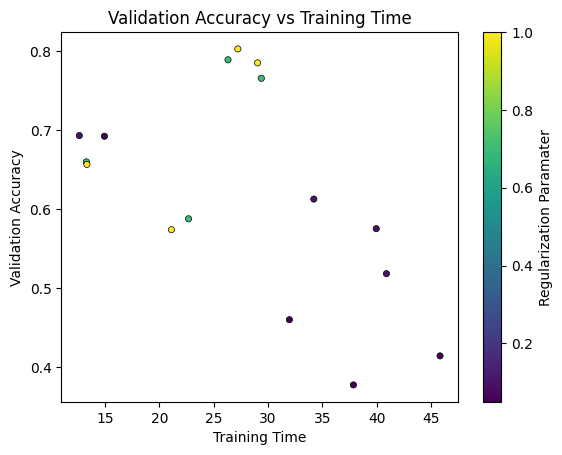

In [23]:
ax = results_df.plot.scatter(x='training_time', y='validation_accuracy', c="reg_param", colormap='viridis', edgecolors='black', linewidths=0.5)
ax.set_title('Validation Accuracy vs Training Time')
ax.set_xlabel('Training Time')
ax.set_ylabel('Validation Accuracy')
colorbar = ax.collections[0].colorbar
colorbar.set_label('Regularization Paramater')